In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

from rliable import library as rly
from rliable import metrics
from rliable import plot_utils


Queue_reward_queueAverage = pd.read_csv('A2C_queue_average_reward_m4_steps_50000_run1.csv')
Data_fixed = pd.read_csv('fixed_steps_50000_run1.csv')


In [3]:
def data_preProcessing(df, col):
    smooth_window1 = 100
    smooth_window2 = 80
    smooth_window3 = 40
    
    # smooth the value
    df['smoothed_' + col] = df[col].ewm(span=smooth_window1, adjust=False).mean()
    df['smoothed_' + col] = df['smoothed_' + col].ewm(span=smooth_window2, adjust=False).mean()
    df['smoothed_' + col] = df['smoothed_' + col].ewm(span=smooth_window3, adjust=False).mean()
    df['std_' + col] = np.std(df['smoothed_' + col])
    
    return df, df['sim_step'], df['smoothed_' + col], df['std_' + col]

In [4]:
df_RewardQueueMean, sim_step, queue_RewardQueueMean, std_queue_RewardQueueMean = data_preProcessing(Queue_reward_queueAverage, 'total_queue')
df_fixed, _, fixed, std_fixed =  data_preProcessing(Data_fixed, 'total_queue')

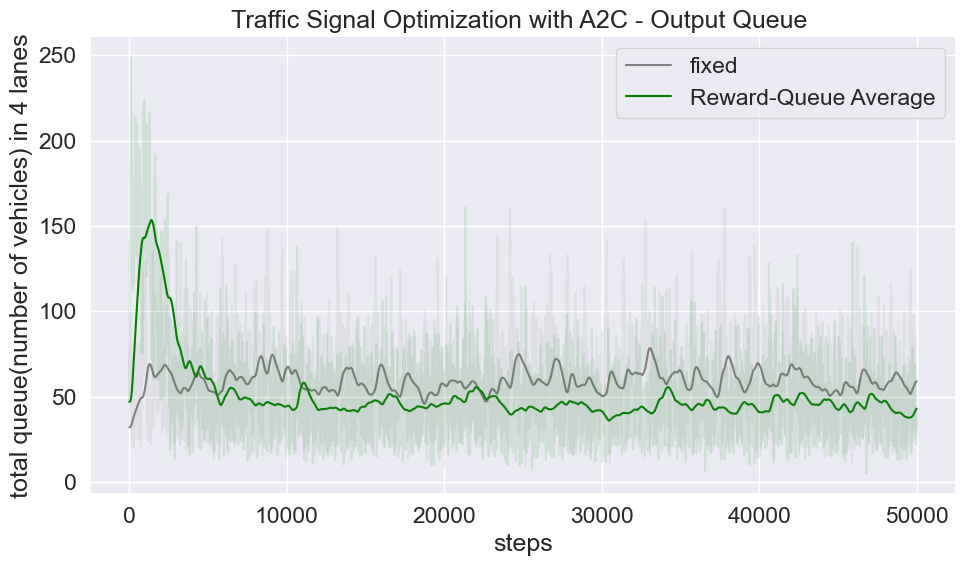

In [24]:
sns.set(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(10, 6))


sns.lineplot(data=df_fixed, x='sim_step', y='smoothed_total_queue', label='fixed', color='grey')
sns.lineplot(data=df_RewardQueueMean, x='sim_step', y='smoothed_total_queue', label='Reward-Queue Average', color='green')
sns.lineplot(data=df_fixed, x='sim_step', y='total_queue', color='grey', alpha=0.1)
sns.lineplot(data=df_RewardQueueMean, x='sim_step', y='total_queue', color='green', alpha=0.1)
# sns.lineplot(data=df_RewardQueue, x='sim_step', y='smoothed_total_queue', label='Reward-Queue', color='blue')

# variance
# plt.fill_between(sim_step, 
#                  fixed-std_fixed, 
#                  fixed+std_fixed,
#                  color='grey', 
#                  alpha=0.1)
# plt.fill_between(sim_step, 
#                  queue_RewardQueueMean-std_queue_RewardQueueMean, 
#                  queue_RewardQueueMean+std_queue_RewardQueueMean,
#                  color='green', 
#                  alpha=0.1)
# plt.fill_between(sim_step, 
#                  queue_RewardQueue-std_queue_RewardQueue, 
#                  queue_RewardQueue+std_queue_RewardQueue,
#                  color='blue', 
#                  alpha=0.1)

plt.legend()
plt.title('Traffic Signal Optimization with A2C - Output Queue ')
plt.xlabel('steps')
plt.ylabel('total queue(number of vehicles) in 4 lanes')
plt.tight_layout()
plt.savefig('Bild/Output Queue - 2 Rewards and fixed', dpi=300)
plt.show()

In [25]:
WaitingTime_reward_waitingTime1 = pd.read_csv('A2C_waiting_time_reward_m4_steps_50000_run1.csv')
WaitingTime_reward_waitingTime2 = pd.read_csv('A2C_waiting_time_reward2_m4_steps_50000_run1.csv')

In [26]:
df_WaitingTime_r1, _, waitingTime_r1, std_waitingTime_r1 = data_preProcessing(WaitingTime_reward_waitingTime1, 'total_waiting_time')
df_WaitingTime_r2, _, waitingTime_r2, std_waitingTime_r2 = data_preProcessing(WaitingTime_reward_waitingTime2, 'total_waiting_time')
df_WaitingTime_fixed, _, waitingTime_fixed, std_waitingTime_fixed = data_preProcessing(Data_fixed, 'total_waiting_time')

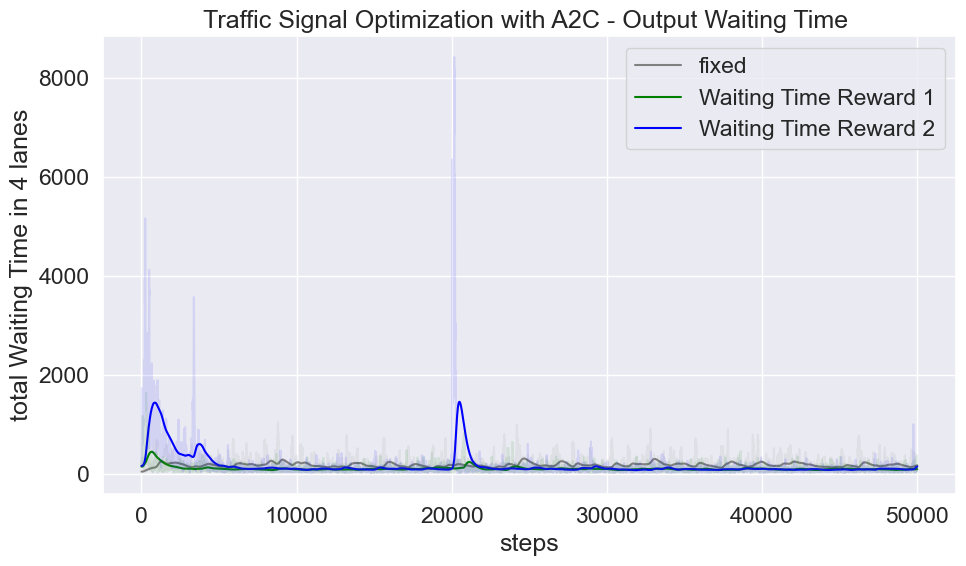

In [27]:
sns.set(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_WaitingTime_fixed, x='sim_step', y='smoothed_total_waiting_time', label='fixed', color='grey')
sns.lineplot(data=df_WaitingTime_r1, x='sim_step', y='smoothed_total_waiting_time', label='Waiting Time Reward 1', color='green')
sns.lineplot(data=df_WaitingTime_r2, x='sim_step', y='smoothed_total_waiting_time', label='Waiting Time Reward 2', color='blue')

sns.lineplot(data=df_WaitingTime_fixed, x='sim_step', y='total_waiting_time', color='grey', alpha=0.1)
sns.lineplot(data=df_WaitingTime_r1, x='sim_step', y='total_waiting_time', color='green', alpha=0.1)
sns.lineplot(data=df_WaitingTime_r2, x='sim_step', y='total_waiting_time', color='blue', alpha=0.1)

# variance
# plt.fill_between(sim_step, 
#                  waitingTime_fixed-std_waitingTime_fixed, 
#                  waitingTime_fixed+std_waitingTime_fixed,
#                  color='grey', 
#                  alpha=0.1)
# plt.fill_between(sim_step, 
#                  waitingTime_r1-std_waitingTime_r1, 
#                  waitingTime_r1+std_waitingTime_r1,
#                  color='green', 
#                  alpha=0.1)
# plt.fill_between(sim_step, 
#                  waitingTime_r2-std_waitingTime_r2, 
#                  waitingTime_r2+std_waitingTime_r2,
#                  color='blue', 
#                  alpha=0.1)

plt.legend()
plt.title('Traffic Signal Optimization with A2C - Output Waiting Time ')
plt.xlabel('steps')
plt.ylabel('total Waiting Time in 4 lanes')
plt.tight_layout()
plt.savefig('Bild/Output Waiting Time - 2 Rewards and fixed', dpi=300)
plt.show()

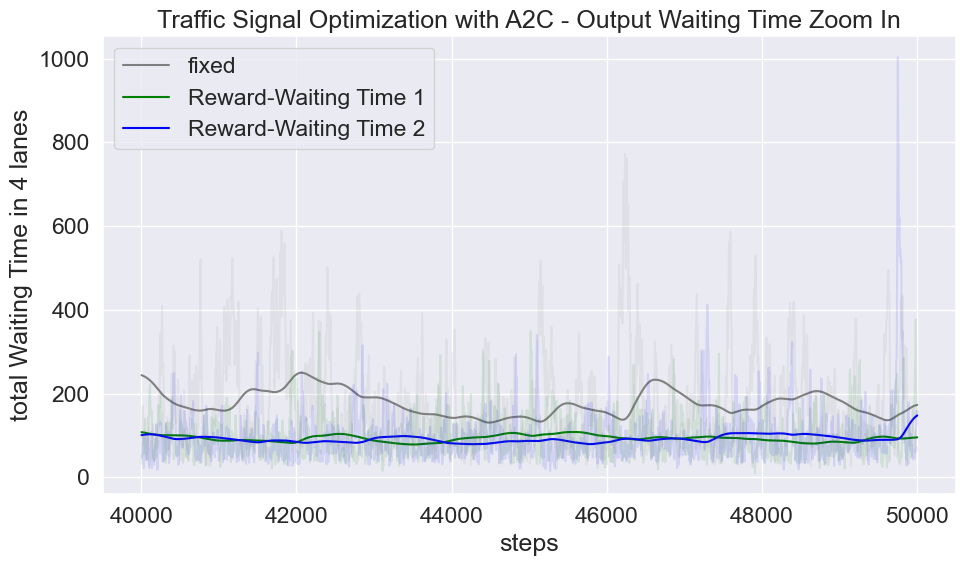

In [28]:

sns.set(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_WaitingTime_fixed[df_WaitingTime_fixed['sim_step'] > 40000], x='sim_step', y='smoothed_total_waiting_time', label='fixed', color='grey')
sns.lineplot(data=df_WaitingTime_r1[df_WaitingTime_r1['sim_step'] > 40000], x='sim_step', y='smoothed_total_waiting_time', label='Reward-Waiting Time 1', color='green')
sns.lineplot(data=df_WaitingTime_r2[df_WaitingTime_r2['sim_step'] > 40000], x='sim_step', y='smoothed_total_waiting_time', label='Reward-Waiting Time 2', color='blue')

sns.lineplot(data=df_WaitingTime_fixed[df_WaitingTime_fixed['sim_step'] > 40000], x='sim_step', y='total_waiting_time', color='grey', alpha=0.1)
sns.lineplot(data=df_WaitingTime_r1[df_WaitingTime_r1['sim_step'] > 40000], x='sim_step', y='total_waiting_time', color='green', alpha=0.1)
sns.lineplot(data=df_WaitingTime_r2[df_WaitingTime_r2['sim_step'] > 40000], x='sim_step', y='total_waiting_time', color='blue', alpha=0.1)

# plt.fill_between(sim_step.iloc[8000:], 
#                  waitingTime_fixed.iloc[8000:]-std_waitingTime_fixed.iloc[8000:], 
#                  waitingTime_fixed.iloc[8000:]+std_waitingTime_fixed.iloc[8000:],
#                  color='grey', 
#                  alpha=0.1)
# plt.fill_between(sim_step.iloc[8000:], 
#                  waitingTime_r1.iloc[8000:]-std_waitingTime_r1.iloc[8000:], 
#                  waitingTime_r1.iloc[8000:]+std_waitingTime_r1.iloc[8000:],
#                  color='green', 
#                  alpha=0.1)
# plt.fill_between(sim_step.iloc[8000:], 
#                  waitingTime_r2.iloc[8000:]-std_waitingTime_r2.iloc[8000:], 
#                  waitingTime_r2.iloc[8000:]+std_waitingTime_r2.iloc[8000:],
#                  color='blue', 
#                  alpha=0.1)

plt.legend()
plt.title('Traffic Signal Optimization with A2C - Output Waiting Time Zoom In')
plt.xlabel('steps')
plt.ylabel('total Waiting Time in 4 lanes')
plt.tight_layout()
plt.savefig('Bild/Output Waiting Time - 2 Rewards and fixed Zomm In', dpi=300)
plt.show()

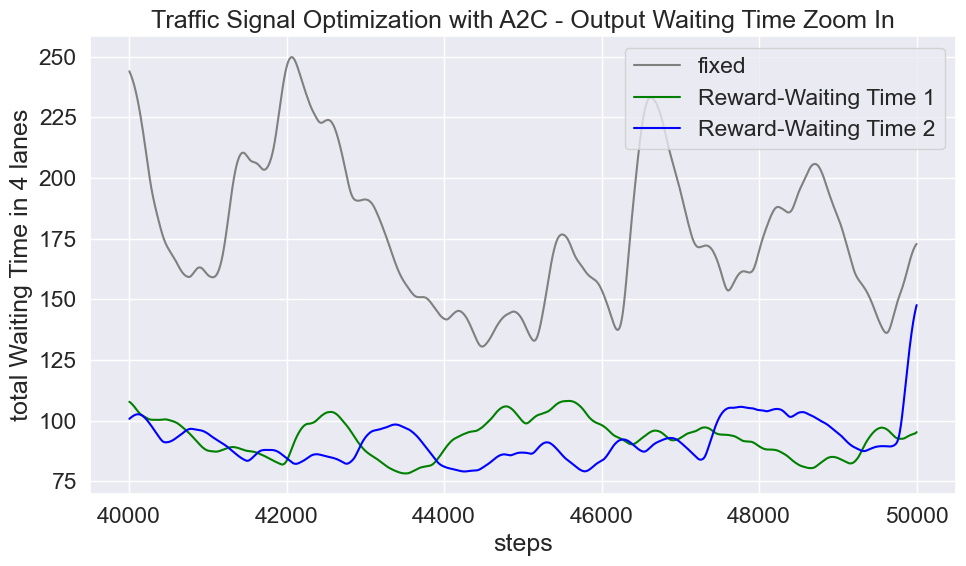

In [29]:

sns.set(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_WaitingTime_fixed[df_WaitingTime_fixed['sim_step'] > 40000], x='sim_step', y='smoothed_total_waiting_time', label='fixed', color='grey')
sns.lineplot(data=df_WaitingTime_r1[df_WaitingTime_r1['sim_step'] > 40000], x='sim_step', y='smoothed_total_waiting_time', label='Reward-Waiting Time 1', color='green')
sns.lineplot(data=df_WaitingTime_r2[df_WaitingTime_r2['sim_step'] > 40000], x='sim_step', y='smoothed_total_waiting_time', label='Reward-Waiting Time 2', color='blue')

plt.legend()
plt.title('Traffic Signal Optimization with A2C - Output Waiting Time Zoom In')
plt.xlabel('steps')
plt.ylabel('total Waiting Time in 4 lanes')
plt.tight_layout()
plt.savefig('Bild/Output Waiting Time - 3 Rewards and fixed Zomm In no Var', dpi=300)
plt.show()

In [30]:
Co2_reward_co2 = pd.read_csv('A2C_co2_reward_m4_steps_50000_run1.csv')
Co2_reward_co2.columns

Index(['sim_step', 'reward', 'total_queue', 'total_waiting_time',
       'total_co2_emissions'],
      dtype='object')

In [31]:
df_co2_reward_co2, _, co2_r1, std_co2_r1 = data_preProcessing(Co2_reward_co2, 'total_co2_emissions')
df_co2_fixed, _, co2_fixed, std_co2_fixed = data_preProcessing(Data_fixed, 'total_co2_emissions')

In [32]:
df_co2_reward_co2.columns

Index(['sim_step', 'reward', 'total_queue', 'total_waiting_time',
       'total_co2_emissions', 'smoothed_total_co2_emissions',
       'std_total_co2_emissions'],
      dtype='object')

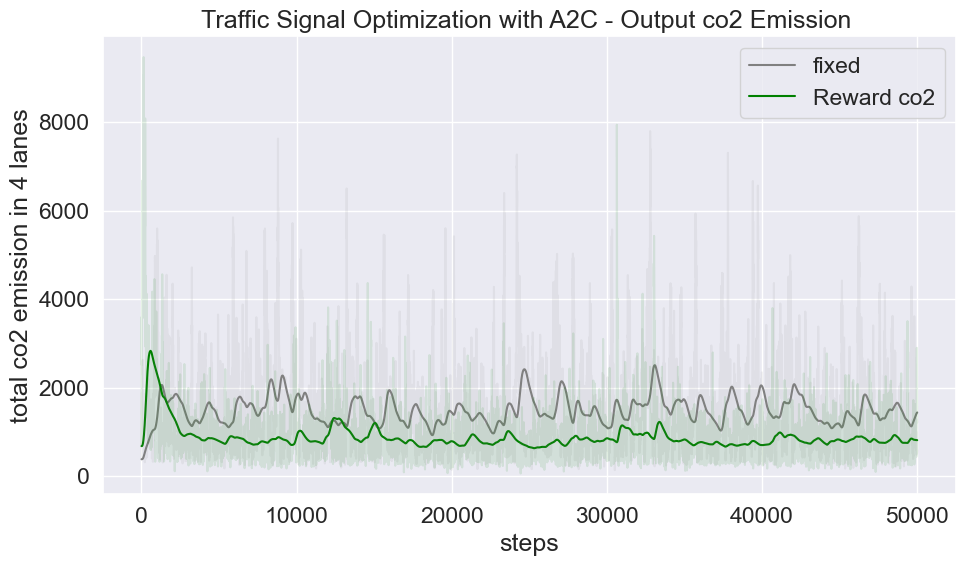

In [33]:
sns.set(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_co2_fixed, x='sim_step', y='smoothed_total_co2_emissions', label='fixed', color='grey')
sns.lineplot(data=df_co2_reward_co2, x='sim_step', y='smoothed_total_co2_emissions', label='Reward co2', color='green')

sns.lineplot(data=df_co2_fixed, x='sim_step', y='total_co2_emissions', color='grey', alpha=0.1)
sns.lineplot(data=df_co2_reward_co2, x='sim_step', y='total_co2_emissions', color='green', alpha=0.1)


# variance

# plt.fill_between(sim_step, 
#                  co2_fixed-std_co2_fixed, 
#                  co2_fixed+std_co2_fixed,
#                  color='grey', 
#                  alpha=0.1)
# plt.fill_between(sim_step, 
#                  co2_r1-std_co2_r1, 
#                  co2_r1+std_co2_r1,
#                  color='green', 
#                  alpha=0.1)

plt.legend()
plt.title('Traffic Signal Optimization with A2C - Output co2 Emission ')
plt.xlabel('steps')
plt.ylabel('total co2 emission in 4 lanes')
plt.tight_layout()
plt.savefig('Bild/Output co2 emission - 1 Reward and fixed', dpi=300)
plt.show()

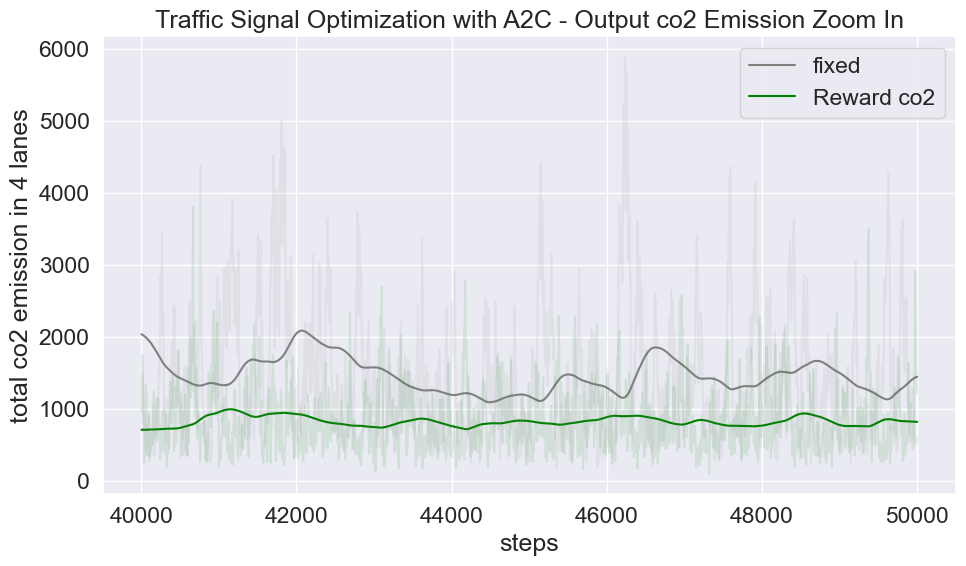

In [34]:
sns.set(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_co2_fixed[df_co2_fixed['sim_step'] > 40000], x='sim_step', y='smoothed_total_co2_emissions', label='fixed', color='grey')
sns.lineplot(data=df_co2_reward_co2[df_co2_reward_co2['sim_step'] > 40000], x='sim_step', y='smoothed_total_co2_emissions', label='Reward co2', color='green')

sns.lineplot(data=df_co2_fixed[df_co2_fixed['sim_step'] > 40000], x='sim_step', y='total_co2_emissions', color='grey', alpha=0.1)
sns.lineplot(data=df_co2_reward_co2[df_co2_reward_co2['sim_step'] > 40000], x='sim_step', y='total_co2_emissions', color='green', alpha=0.1)

# variance

# plt.fill_between(sim_step.iloc[8000:], 
#                  co2_fixed.iloc[8000:]-std_co2_fixed.iloc[8000:], 
#                  co2_fixed.iloc[8000:]+std_co2_fixed.iloc[8000:],
#                  color='grey', 
#                  alpha=0.1)
# plt.fill_between(sim_step.iloc[8000:], 
#                  co2_r1.iloc[8000:]-std_co2_r1.iloc[8000:], 
#                  co2_r1.iloc[8000:]+std_co2_r1.iloc[8000:],
#                  color='green', 
#                  alpha=0.1)

plt.legend()
plt.title('Traffic Signal Optimization with A2C - Output co2 Emission Zoom In')
plt.xlabel('steps')
plt.ylabel('total co2 emission in 4 lanes')
plt.tight_layout()
plt.savefig('Bild/Output co2 emission - 1 Reward and fixed Zoom In', dpi=300)
plt.show()

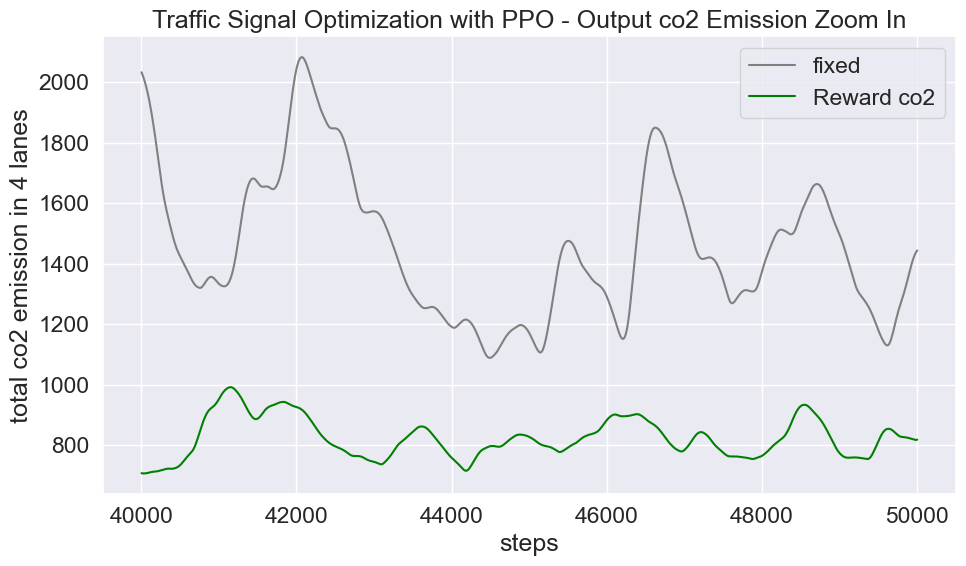

In [35]:
sns.set(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_co2_fixed[df_co2_fixed['sim_step'] > 40000], x='sim_step', y='smoothed_total_co2_emissions', label='fixed', color='grey')
sns.lineplot(data=df_co2_reward_co2[df_co2_reward_co2['sim_step'] > 40000], x='sim_step', y='smoothed_total_co2_emissions', label='Reward co2', color='green')

plt.legend()
plt.title('Traffic Signal Optimization with PPO - Output co2 Emission Zoom In')
plt.xlabel('steps')
plt.ylabel('total co2 emission in 4 lanes')
plt.tight_layout()
plt.savefig('Bild/Output co2 emission - 1 Reward and fixed Zoom In no Var', dpi=300)
plt.show()